In [1]:
from dotenv import load_dotenv
import os

In [2]:
load_dotenv()

True

In [3]:
os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY')

## System architecture

### Supervisor agent architecture

1. A supervisor node (Acts as router)
2. Filter node (Filters the trades based on the filter criteria)
3. Matching node (Match the given records)
4. Affirmation node (Affirm the given records)

In [4]:
from langgraph.types import Command

In [5]:
from langgraph.graph import MessagesState, StateGraph, START, END

In [6]:
from typing import Literal

In [7]:
from agents.supervisor_agent import supervisor_agent
from agents.filter_agent import filter_agent
from agents.matcher_agent import matcher_agent
from agents.affirmer_agent import affirmer_agent

In [8]:
workflow = StateGraph(MessagesState)

In [9]:
workflow.add_node(supervisor_agent, destinations=['filter_agent', 'matcher_agent', 'affirmer_agent', END])

In [10]:
workflow.add_node('filter_agent', filter_agent)
workflow.add_node('matcher_agent', matcher_agent)
workflow.add_node('affirmer_agent', affirmer_agent)

In [11]:
workflow.add_edge(START, 'supervisor_agent')

In [12]:
workflow.add_edge('filter_agent', 'supervisor_agent')
workflow.add_edge('matcher_agent', 'supervisor_agent')
workflow.add_edge('affirmer_agent', 'supervisor_agent')

In [13]:
workflow.add_edge('supervisor_agent', END)

In [14]:
app = workflow.compile()

In [15]:
from IPython.display import display, Image

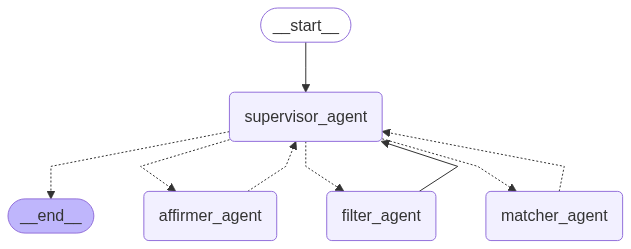

In [16]:
display(Image(app.get_graph().draw_mermaid_png()))

In [24]:
from langchain_core.messages import BaseMessage

In [28]:
last_message = ""

In [29]:
# Stream and extract the final assistant response
for output in app.stream({
    'messages': [{'role': 'user', 'content': 'Give me all the matched trades for last week.'}]
}):
    for agent_name, agent_payload in output.items():
        print('##agent_name', agent_name)
        if isinstance(agent_payload, dict) and "messages" in agent_payload:
                messages = agent_payload["messages"]
                print('##messages', messages)
                # Collect all message types derived from BaseMessage that have content
                valid_msgs = [
                    msg for msg in messages if isinstance(msg, BaseMessage) and getattr(msg, "content", None)
                ]
                if valid_msgs:
                    last_message = valid_msgs[-1].content

##agent_name supervisor_agent
##messages [HumanMessage(content='Give me all the matched trades for last week.', additional_kwargs={}, response_metadata={}, id='68dd4d87-da8f-4530-9857-1b5f6a5bf9f2'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_GpIeIQCiLJybbdiSuqX9kyH4', 'function': {'arguments': '{}', 'name': 'transfer_to_filter_agent'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 808, 'total_tokens': 820, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': None, 'id': 'chatcmpl-BtBT4TiSh72iKw6gdC5ZrVsIjapMW', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, name='supervisor_agent', id='run--967ec667-6e99-403e-9fc2-97978b695c17-0', tool_calls=[{'name': '

In [32]:
print(last_message)
print(type(last_message))

{"result":[{"id":"T026","party":"VoyagerTrust","counter_party":"CometCapital","trade_date":"2025-07-10","matching_status":"Matched","instrument":"Equity","notional_amount":260000.0,"currency":"USD"}]}
<class 'str'>


In [22]:
for output in app.stream({
    'messages': [{'role': 'user', 'content': 'Give me all the matched trades for last week.'}]
}):
    print('##output', output)
    print("***************************"*4)

##output {'supervisor_agent': {'messages': [HumanMessage(content='Give me all the matched trades for last week.', additional_kwargs={}, response_metadata={}, id='7a7ece01-0cd1-4515-bad5-bc15bd56ffec'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_6QcXLOIpVAZyN6ocMeTylsed', 'function': {'arguments': '{}', 'name': 'transfer_to_filter_agent'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 808, 'total_tokens': 820, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': None, 'id': 'chatcmpl-BtBGsaW7nHUdBN46qxGBYSx3vs2Hp', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, name='supervisor_agent', id='run--04a13460-9b79-4ed5-a465-7b50cffbaffb-0', tool_calls=[{'name':

##output {'supervisor_agent': {'messages': [HumanMessage(content='Give me all the matched trades for last week.', additional_kwargs={}, response_metadata={}, id='7a7ece01-0cd1-4515-bad5-bc15bd56ffec'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_6QcXLOIpVAZyN6ocMeTylsed', 'function': {'arguments': '{}', 'name': 'transfer_to_filter_agent'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 808, 'total_tokens': 820, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': None, 'id': 'chatcmpl-BtBGsaW7nHUdBN46qxGBYSx3vs2Hp', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, name='supervisor_agent', id='run--04a13460-9b79-4ed5-a465-7b50cffbaffb-0', tool_calls=[{'name': 'transfer_to_filter_agent', 'args': {}, 'id': 'call_6QcXLOIpVAZyN6ocMeTylsed', 'type': 'tool_call'}], usage_metadata={'input_tokens': 808, 'output_tokens': 12, 'total_tokens': 820, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), {'role': 'tool', 'content': 'Successfully transferred to filter_agent', 'tool_call_id': 'call_6QcXLOIpVAZyN6ocMeTylsed', 'name': 'transfer_to_filter_agent'}]}}
************************************************************************************************************
##output {'filter_agent': {'messages': [HumanMessage(content='Give me all the matched trades for last week.', additional_kwargs={}, response_metadata={}, id='7a7ece01-0cd1-4515-bad5-bc15bd56ffec'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_6QcXLOIpVAZyN6ocMeTylsed', 'function': {'arguments': '{}', 'name': 'transfer_to_filter_agent'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 808, 'total_tokens': 820, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': None, 'id': 'chatcmpl-BtBGsaW7nHUdBN46qxGBYSx3vs2Hp', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, name='supervisor_agent', id='run--04a13460-9b79-4ed5-a465-7b50cffbaffb-0', tool_calls=[{'name': 'transfer_to_filter_agent', 'args': {}, 'id': 'call_6QcXLOIpVAZyN6ocMeTylsed', 'type': 'tool_call'}], usage_metadata={'input_tokens': 808, 'output_tokens': 12, 'total_tokens': 820, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), ToolMessage(content='Successfully transferred to filter_agent', name='transfer_to_filter_agent', id='6324e320-461f-4c17-a131-4f8dd37bcf3b', tool_call_id='call_6QcXLOIpVAZyN6ocMeTylsed'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_4xij6WfV2vT8cWueDHfJIkf1', 'function': {'arguments': '{"start_date":"2025-07-07","end_date":"2025-07-13","matching_status":"Matched"}', 'name': 'filter_trades'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 908, 'total_tokens': 944, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': None, 'id': 'chatcmpl-BtBGtiVsIYdbmPkGr0dwSn9dztQXg', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, name='filter_agent', id='run--84eaf9ab-eb48-4549-8dc3-73ef0d22659d-0', tool_calls=[{'name': 'filter_trades', 'args': {'start_date': '2025-07-07', 'end_date': '2025-07-13', 'matching_status': 'Matched'}, 'id': 'call_4xij6WfV2vT8cWueDHfJIkf1', 'type': 'tool_call'}], usage_metadata={'input_tokens': 908, 'output_tokens': 36, 'total_tokens': 944, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), ToolMessage(content="result=[TradesSchema(id='T026', party='VoyagerTrust', counter_party='CometCapital', trade_date='2025-07-10', matching_status='Matched', instrument='Equity', notional_amount=260000.0, currency='USD')]", name='filter_trades', id='beaf7c55-7c8e-4966-acca-1a9ccae13aa2', tool_call_id='call_4xij6WfV2vT8cWueDHfJIkf1'), AIMessage(content='{"result":[{"id":"T026","party":"VoyagerTrust","counter_party":"CometCapital","trade_date":"2025-07-10","matching_status":"Matched","instrument":"Equity","notional_amount":260000.0,"currency":"USD"}]}', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 1011, 'total_tokens': 1068, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': None, 'id': 'chatcmpl-BtBGu09sgZ5MvYoimqf8sqrltOL84', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, name='filter_agent', id='run--2728eae1-006f-453c-8965-00b663a84625-0', usage_metadata={'input_tokens': 1011, 'output_tokens': 57, 'total_tokens': 1068, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}
************************************************************************************************************
##output {'supervisor_agent': 
{'messages': [
    HumanMessage(content='Give me all the matched trades for last week.', additional_kwargs={}, response_metadata={}, id='7a7ece01-0cd1-4515-bad5-bc15bd56ffec'), 
    
    AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_6QcXLOIpVAZyN6ocMeTylsed', 'function': {'arguments': '{}', 'name': 'transfer_to_filter_agent'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 808, 'total_tokens': 820, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': None, 'id': 'chatcmpl-BtBGsaW7nHUdBN46qxGBYSx3vs2Hp', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, name='supervisor_agent', id='run--04a13460-9b79-4ed5-a465-7b50cffbaffb-0', tool_calls=[{'name': 'transfer_to_filter_agent', 'args': {}, 'id': 'call_6QcXLOIpVAZyN6ocMeTylsed', 'type': 'tool_call'}], usage_metadata={'input_tokens': 808, 'output_tokens': 12, 'total_tokens': 820, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), ToolMessage(content='Successfully transferred to filter_agent', name='transfer_to_filter_agent', id='6324e320-461f-4c17-a131-4f8dd37bcf3b', tool_call_id='call_6QcXLOIpVAZyN6ocMeTylsed'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_4xij6WfV2vT8cWueDHfJIkf1', 'function': {'arguments': '{"start_date":"2025-07-07","end_date":"2025-07-13","matching_status":"Matched"}', 'name': 'filter_trades'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 908, 'total_tokens': 944, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': None, 'id': 'chatcmpl-BtBGtiVsIYdbmPkGr0dwSn9dztQXg', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, name='filter_agent', id='run--84eaf9ab-eb48-4549-8dc3-73ef0d22659d-0', tool_calls=[{'name': 'filter_trades', 'args': {'start_date': '2025-07-07', 'end_date': '2025-07-13', 'matching_status': 'Matched'}, 'id': 'call_4xij6WfV2vT8cWueDHfJIkf1', 'type': 'tool_call'}], usage_metadata={'input_tokens': 908, 'output_tokens': 36, 'total_tokens': 944, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),

ToolMessage(content="result=[TradesSchema(id='T026', party='VoyagerTrust', counter_party='CometCapital', trade_date='2025-07-10', matching_status='Matched', instrument='Equity', notional_amount=260000.0, currency='USD')]", name='filter_trades', id='beaf7c55-7c8e-4966-acca-1a9ccae13aa2', tool_call_id='call_4xij6WfV2vT8cWueDHfJIkf1'),

AIMessage(content='{"result":[{"id":"T026","party":"VoyagerTrust","counter_party":"CometCapital","trade_date":"2025-07-10","matching_status":"Matched","instrument":"Equity","notional_amount":260000.0,"currency":"USD"}]}', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 1011, 'total_tokens': 1068, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': None, 'id': 'chatcmpl-BtBGu09sgZ5MvYoimqf8sqrltOL84', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, name='filter_agent', id='run--2728eae1-006f-453c-8965-00b663a84625-0', usage_metadata={'input_tokens': 1011, 'output_tokens': 57, 'total_tokens': 1068, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),

AIMessage(content='{"result":[{"id":"T026","party":"VoyagerTrust","counter_party":"CometCapital","trade_date":"2025-07-10","matching_status":"Matched","instrument":"Equity","notional_amount":260000.0,"currency":"USD"}]}', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 1005, 'total_tokens': 1062, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': None, 'id': 'chatcmpl-BtBGxapJgNQ00tKGedidto2w3KHFg', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, name='supervisor_agent', id='run--0554143f-8d34-4539-a57f-6d8ff9535e6e-0', usage_metadata={'input_tokens': 1005, 'output_tokens': 57, 'total_tokens': 1062, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}
************************************************************************************************************